# NLP Project - Predicting Programming Language

*Welcome to the Ryan's Codeup Data Science MVP template! The sections in this notebook are here to help you organize your data science project into a clear workflow. The text in the markdown cells is there to help you understand the goals at each stage. Follow their instructions to move your work along, and then delete the prompts when you're done.*

*Finish the mvp workflow and then go back and think critically about what you might of missed. The point isn't to doubt yourself; the purpose here is to check your blind spots and see if you can't find more information or insights that will help you to deliver better results.*

*Better yet, and this cannot be stressed enough, don't ask **yourself** these questions, but bring them up in conversation with peers, experts in other fields, or even complete strangers -- anyone with a different point of view is going to be able to help you to see what things you are taking for granted.*

## Summary

*What are you going to do and how are you going to do it? Write out your thoughts here in a way that you can easily explain your work to members on your team.*

*This is your space to put together the elevator pitch for your project, and then follow it up with a plan of attack. It's going to be short, but that doesn't mean you won't need to spend much time putting it together -- this is a process of dropping the bad ideas until you're left with something that you are confident you can work with.*

*Don't take shortcuts here; coming up with a useful question and a straightforward work plan is going to make the rest of your project flow much more smoothly from start to finish.*

*One final, and very important, point: the main reason for thinking about this stage as how you're going to describe your work to others is that you should be talking about work with others!!! The more you work on your project in isolation, the better your ideas will sound to you -- even the bad ones. Listening to your ideas spoken out loud in your own voice is an excellent sanity check, and feedback from your peers is your most valuable resource.*

**You don't have to answer every question, but answer each that you can now and then come back later. Also, if the question doesn't apply, remove it.**

### Problem Statement

*Think about the problem you are trying to solve as a business case. After you've built your model, who is going to use it and what will they do with it? Who are your customers and stakeholders and what is their need? The need is not the data they are trying to understand -- think of the need as a specific action they would like to take or a question they want to answer.*
    
    - For this project, you will be scraping data from GitHub repository README files. The goal will be to build a model that can predict what programming language a repository is, given the text of the README file.
    
*What is your model going to **do** in the real world? If you can answer this, and if you keep that answer in mind as you complete your work, you will have a much clearer view of where to go at each step.*

* Who are your customers?
    - general audience
* What is the problem?
    - want to predict program language from words in readme content
* What solution do you propose?
    - Explore readme content for common words and phrases to identify features 
    - Model on Bag or Words and TF-IDF 
* How will you know if your work is good?
    - ideally model F1 score and/or precission will be better than baseline

*Also, think critacally here. If someone was paying you to do this work, what would they want you to build.*

### Work Plan

**Assignment**
- For this project, you will be scraping data from GitHub repository README files. The goal will be to build a model that can predict what programming language a repository is, given the text of the README file.

**Approach**
- Using webscraping collect readme text and programming language from a minimum of 100 GitHub repositories
- Explore the collected information to determine features for modeling
- Verify dataset is not imbalanced, correct with over/under sampling if needed
- Create a Baseline Model using most frequent language in dataset as prediction
- Use BOW (Bag of Words) and TF-IDF machine learning algorithms to improve prediction accuracy/F1 score/precision/recall
- Identify conclusions and next steps


## Imports

*Keep all your imports in one place. This will make it much easier to see everything that you are using*

In [1]:
import acquire_ry
import ry_prepare
import ry_wrangle
import explore
import model as m

explore.set_plotting_defaults()

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
import nltk
import scipy.stats as stats

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import ComplementNB, MultinomialNB

# Acquire the Data

- Decided to search for repos with the word "environmental" to see if there was a language that was in more frequent use for these repos
- Created function to fetch all urls from the first search page and return them as a list
    - Discovered each search page contained links to 10 repos
- With that list of urls then inspected the repo for the HTML needed to get the readme text and primary(first listed) programming language
- Updated url function to iterate through search pages and return flattened list of urls
    - had to only fetch info from repos with needed text (exclude empty or repos with text not in container)
    - this returned 827 observations for 100 search pages (or 1,000 repos) scrapped
- cached .json file for further use as function run time is very high
- all functions stored in acquire.py file for future replication

*After completing this step, be sure to edit the README data dictionary to include descriptions of where you obtained your data and what information it contains.*

# Prepare the Data

- load data from cached file
- noted that over 10 different languages are present in the dataset
    - decided to focus on the top 4 in our dataset = Python, JavaScript, HTML, Java
    - added words column and doc_length column in preparation for Explore
- cleaned data
    - change all to lowercase, remove special characters by converting to ascii then returning to UTF-8, and replace anything that is not a letter, number, whitespace or a single quote
    - Use NLTK TlktokTokenizer to seperate/tokenize text
    - Remove stopwords from text with function that allows for additional words to exclude, or words to not exclude
        - NOTE: during Exploration noticed words 'data', 'file', and 'environmental' appear in the top 5 words for all categories
        - Added these words to the stopwords list to reduce noise
     - Create column of stemmed text and separate column of lemmatized text for Exploration and Modeling
- Split the dataset into train, validate, and test datasets and defined X and y sets for modeling, also return a separate set train_exp for Exploration

In [2]:
# full wrangle test
train_exp, X_train, y_train, X_validate, y_validate, X_test, y_test = ry_wrangle.wrangle_github(cached=True)

acquiring data
preparing data
splitting data
complete
X-train shape (234, 6) X_validate shape (79, 6) X_test shape (79, 6)


# Explore the Data

- Check for imbalance in the dataset
    - Balance looks ok, do not need to over/under sample
- create list of words by language category
- noticed words 'data', 'file', and 'environmental' appear in the top 5 words for all categories
    - these words have been removed to reduce noise


In [3]:
# check balance of dataset for under/over sampling
explore.check_proportion(train_exp)
# balance is not bad, will not need to over/under sample

,n,percent
Python,83,0.354701
JavaScript,62,0.264957
HTML,49,0.209402
Java,40,0.170940


In [4]:
# create a list of words for each language category and remove single letter words
python_words, js_words, html_words, java_words = explore.create_lang_word_list(train_exp)
# get the count of words by category
python_freq, js_freq, html_freq, java_freq = explore.get_count_word_freq(python_words, js_words, html_words, java_words)

In [5]:
python_freq
# note: 4 most common = '00', 'file', 'data', 'environmental'
# results after reduced noise

00                     226
using                  121
install                104
sensor                 100
database                97
                      ... 
dicovery                 1
wanneer                  1
metabeatglobalpyqfb      1
opprinnelig              1
derek                    1
Length: 6976, dtype: int64

In [6]:
js_freq
# note: 'data', 'file', 'environmental' are in top 5 words
# results after reduced noise

system                                                              81
project                                                             77
sensor                                                              75
device                                                              75
install                                                             74
                                                                    ..
uavenvironmentalmonitoring                                           1
61315555515110e56667                                                 1
httpec2174129187236compute1amazonawscom3000                          1
httpstackoverflowcomquestions22776924pythonhowtogetjobresultbyrq     1
132531433                                                            1
Length: 4331, dtype: int64

In [7]:
html_freq
# note: 'data', 'file', 'environmental' are top 3 words
# results after reduced noise

worcester      47
nd             46
retrieved      42
description    41
source         41
               ..
glance          1
simplified      1
xco             1
specified       1
attributed      1
Length: 2495, dtype: int64

In [8]:
java_freq
# note: 'data', 'file', 'environmental' are in top 5 words
# results after reduced noise

property         103
&#9;              85
new               42
environment       37
configuration     32
                ... 
mailtosendto1      1
handel             1
automatic          1
odourous           1
douglas            1
Length: 1806, dtype: int64

In [9]:
# combine list of word counts into df for further exploration
word_counts = explore.create_df_word_counts(python_freq, js_freq, html_freq, java_freq)
word_counts.head()

,Python,JavaScript,HTML,Java,all_words
&#9;,29,4,3,85,121
&#9;&#9;,0,0,0,1,1
&#9;download,1,0,0,0,1
00,226,0,0,0,226
000,1,0,0,0,1


Next, compute proportion of each string that for each language.    
Because the languages are relatively balanced, we should see about the same proportion as the distibution in the dataset. If we see significantly higher or lower proportion, then that word might be a good feature in predicting that language.    
A chi-square test could confirm or deny significance if needed.



In [10]:
word_counts = explore.word_counts_proportion(word_counts)
word_counts.head(10)

,Python,JavaScript,HTML,Java,all_words,prop_python,prop_js,prop_html,prop_java
&#9;,29,4,3,85,121,0.239669,0.033058,0.024793,0.702479
&#9;&#9;,0,0,0,1,1,0.000000,0.000000,0.000000,1.000000
&#9;download,1,0,0,0,1,1.000000,0.000000,0.000000,0.000000
00,226,0,0,0,226,1.000000,0.000000,0.000000,0.000000
000,1,0,0,0,1,1.000000,0.000000,0.000000,0.000000
000000,0,5,0,0,5,0.000000,1.000000,0.000000,0.000000
0000dd,0,1,0,0,1,0.000000,1.000000,0.000000,0.000000
0023,1,0,0,0,1,1.000000,0.000000,0.000000,0.000000
003,1,0,0,0,1,1.000000,0.000000,0.000000,0.000000
005,1,0,0,0,1,1.000000,0.000000,0.000000,0.000000


**Takeaways**

- `&#9;` highest frequency is Java, present in others but much lower, might work for feature? or remove for noise?
- all instances of '00' are Python
- all instances of '000000' are JavaScript

not sure that these are good takeaways or features yet


For now, though, we will filter out rows with strings that only occur less a certain amount, as they are likely not going to provide much information. Let's first look at the distribution of counts to decide where that cutoff will be.

In [11]:
print("The number of words that occur n times: ")
word_counts['all_words'].value_counts().head(20)

The number of words that occur n times: 


1     6423
2     1821
3      709
4      421
5      279
6      208
7      153
8      121
9      109
11      80
10      79
12      73
13      59
14      45
16      45
15      38
19      37
22      33
17      32
20      26
Name: all_words, dtype: int64

In [12]:
# filter out all words that occur less than 20 times
word_counts = word_counts[word_counts['all_words'] >= 20]
word_counts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 428 entries, &#9; to zero
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Python       428 non-null    int64  
 1   JavaScript   428 non-null    int64  
 2   HTML         428 non-null    int64  
 3   Java         428 non-null    int64  
 4   all_words    428 non-null    int64  
 5   prop_python  428 non-null    float64
 6   prop_js      428 non-null    float64
 7   prop_html    428 non-null    float64
 8   prop_java    428 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 33.4+ KB


## Feature Selection Words
This leaves us with 428 words which seems like a good amount (better than 603 with only 15 as cutoff).

We can now use this data set to answer some interesting questions:

Are there words that should be added to the stopword list?
- added 'file', 'data', 'environmental' to the list
- only remaining shared word in Top 5 is 'sensor' and only shared by Python and JavaScript

Are there any words that are unique to one language that could be a feature?
- Yes, have the variables of these words but unsure how to use them as a feature


In [13]:
python_feature = word_counts[word_counts.prop_python == 1.0].sort_values(by='Python', ascending=False)
# These words occur exclusively in Python readme texts. They might be a good list for a Python feature?
python_feature_list = python_feature.index.to_list()

In [14]:
python_feature_list

['00',
 'de',
 'mycodo',
 'classification',
 'cnn',
 'barque',
 'grasp',
 'la',
 'convolutional',
 'outlier']

In [15]:
# repeat for other languages
js_feature = word_counts[word_counts.prop_js == 1.0].sort_values(by='JavaScript', ascending=False)
js_feature_list = js_feature.index.to_list()

In [16]:
js_feature_list

['gps', 'epaper', 'waved']

In [17]:
html_feature = word_counts[word_counts.prop_html == 1.0].sort_values(by='HTML', ascending=False)
html_feature_list = html_feature.index.to_list()

In [18]:
html_feature_list

['worcester']

In [19]:
java_feature = word_counts[word_counts.prop_java == 1.0].sort_values(by='Java', ascending=False)
java_feature_list = java_feature.index.to_list()

In [20]:
java_feature_list

['propertiesmergerbuilder',
 'bean',
 'environmentspecificpropertiesmergerbuilder',
 'mergerbuilder']

## Visualize

<Figure size 864x576 with 0 Axes>

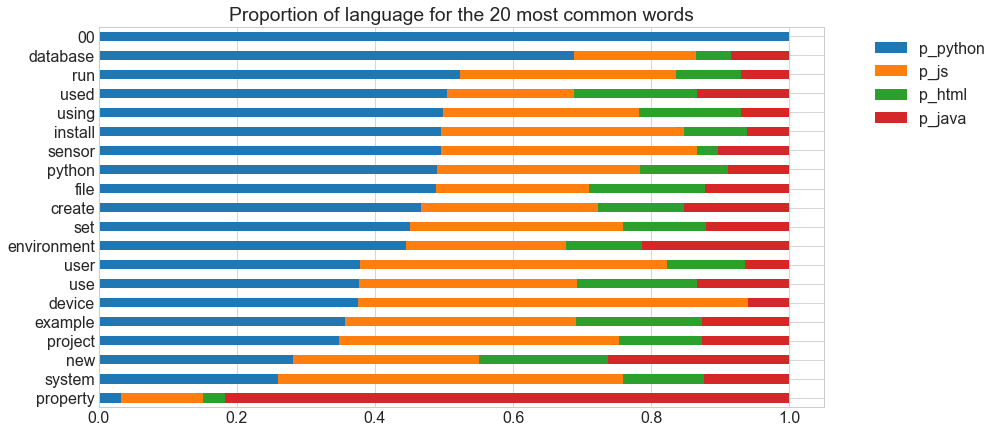

In [21]:
# visualize the % of the term in each language
explore.proportion_visualization(word_counts)

## Bigrams

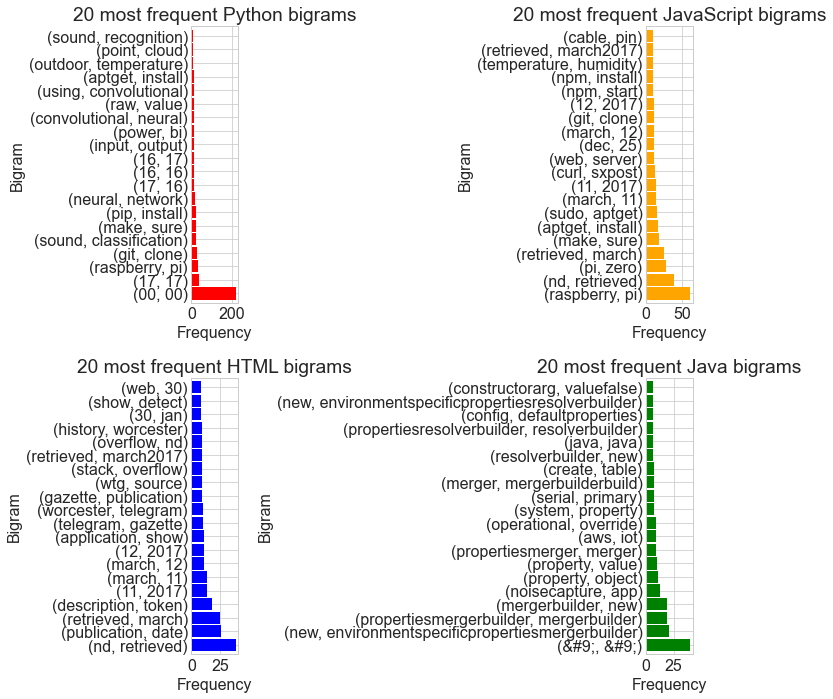

In [22]:
python_bigrams, js_bigrams, html_bigrams, java_bigrams = explore.create_bigrams(python_words, js_words, html_words, java_words)
explore.plot_bigrams(python_bigrams, js_bigrams, html_bigrams, java_bigrams)

## Statistical Testing

- Is the average word count significantly different from the population mean for each language?
- Using a one sample, 2 tail t-test determine if the mean word count (doc_length) for each language is significantly different from the population (overall mean)

Ho: There is no significant difference     
Ha: There is a significant difference     
alpha: .05

**Conclusions**
- For Python, JavaScript, and Java there is no significant difference in the readme length vs the overall mean length
- For HTML there is a significant difference

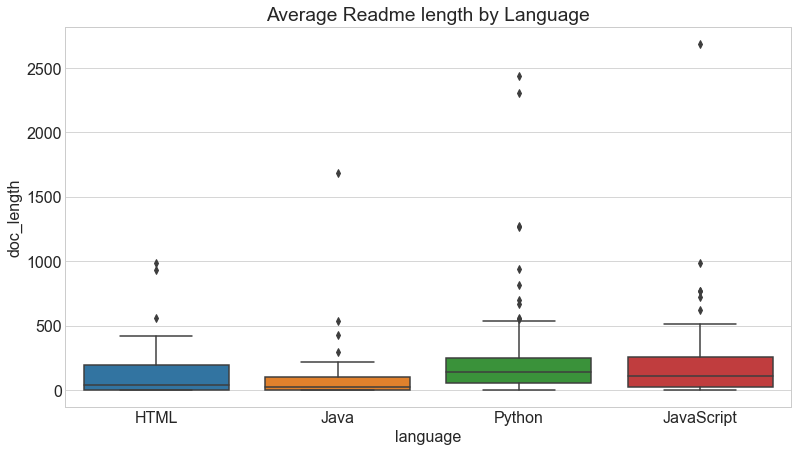

In [23]:
# Visualize programming language by readme length
explore.sns_boxplot(train_exp)

In [24]:
# create sample variables for stats test
python_sample = train_exp[train_exp.language=='Python'].doc_length
js_sample = train_exp[train_exp.language=='JavaScript'].doc_length
html_sample = train_exp[train_exp.language=='HTML'].doc_length
java_sample = train_exp[train_exp.language=='Java'].doc_length
overall_mean = train_exp.doc_length.mean()

In [25]:
# Python vs. overall mean
explore.ttest_1samp(python_sample, overall_mean)
# We fail to reject the null hypothesis and conclude there is no significant difference.

False


(1.3646833174208424, 0.1760858155624954)

In [26]:
# JavaScript vs. overall mean
explore.ttest_1samp(js_sample, overall_mean)
# We fail to reject the null hypothesis and conclude there is no significant difference.

False


(0.39910939021510883, 0.6912064458483929)

In [27]:
# HTML vs. overall mean
explore.ttest_1samp(html_sample, overall_mean)
# We reject the null hypothesis and conclude there is a significant difference for HTML readme files.

True


(-2.12158663408183, 0.03906197489424692)

In [28]:
# Java vs. overall mean
explore.ttest_1samp(java_sample, overall_mean)
# We fail to reject the null hypothesis and conclude there is no significant difference.

False


(-1.8057327766409508, 0.07868308420925468)

# Model the Data

### Feature Extraction
**Bag of Words**
Create CountVectorizer, which create bag-of-words model. We call vectorization the general process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the Bag of Words or “Bag of n-grams” representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document. https://scikit-learn.org/stable/modules/feature_extraction.html

**TF-IDF**
A word that has a high frequency in a document will have a high TF. If it appears in many other documents, than the information the word provides, or uniqueness of that word, is lowered. This is done mathematically by multiplying by the IDF, which will approach 0 and the number of documents with the word increases. Using TfidfVectorizer converts a collection of raw documents to a matrix of TF-IDF features.

### Train Validation Test Split
- Data split already
- Data has been cleaned

**Open Question**
How would you use unique word lists as features for model instead of extracting features?

## Create Bag of Words for Modeling

In [29]:
X_train.head()

,content,clean,stemmed,lemmatized,words,doc_length
26,Environmental_Data_Analytics\nData analytics c...,environmentaldataanalytics analytics course du...,environmentaldataanalyt analyt cours duke univ...,environmentaldataanalytics analytics course du...,"[environmentaldataanalytics, analytics, course...",73
36,MinCED - Mining CRISPRs in Environmental Datas...,minced mining crisprs datasets minced program ...,minc mine crispr dataset minc program find clu...,minced mining crisprs datasets minced program ...,"[minced, mining, crisprs, datasets, minced, pr...",215
35,Open Simulation Interface (OSI)\n\nThe Open Si...,open simulation interface osi open simulation ...,open simul interfac osi open simul interfac 1 ...,open simulation interface osi open simulation ...,"[open, simulation, interface, osi, open, simul...",258
156,Community Water Model (CWatM)\nIIASA\n13rd Oct...,community water model cwatm iiasa 13rd october...,commun water model cwatm iiasa 13rd octob 2020...,community water model cwatm iiasa 13rd october...,"[community, water, model, cwatm, iiasa, 13rd, ...",241
546,EnvironmentalGame\nThis game was developed for...,environmentalgame game developed ' environment...,environmentalgam game develop ' environ scienc...,environmentalgame game developed ' environment...,"[environmentalgame, game, developedenvironment...",9


In [30]:
# Create CountVectorizer, which create bag-of-words model.
# stop_words : Specify language to remove stopwords. 
# min_df: ignore terms that have a document frequency strictly 
# lower than the given threshold. This value is also called cut-off in the literature. 
# If float, the parameter represents a proportion of documents, integer absolute counts. 
# ngram_range: the lower and upper boundary of the range of n-values for 
# different word n-grams or char n-grams to be extracted. 

vectorizer = CountVectorizer(stop_words='english', 
                             min_df=20, 
                             ngram_range=(1,2), 
                             binary=True)

# Learn vocabulary in sentences. 
vectorizer.fit(X_train.stemmed)

# Get dictionary. 
vectorizer.get_feature_names()

# Transform each sentences in vector space.
bow = vectorizer.transform(X_train.stemmed)
X_bow = bow

## Create TF-IDF for Modeling

In [31]:
tfidf = TfidfVectorizer(stop_words='english', min_df=20, 
                             ngram_range=(1,2), 
                             binary=True)

tfidf_sparse_matrix = tfidf.fit_transform(X_train.stemmed)
tfidf_sparse_matrix

# Transform to document-term matrix
vector_spaces = tfidf.transform(X_train.stemmed)
vector_spaces.toarray()

X_tfidf = tfidf_sparse_matrix

In [32]:
# limited word list
unique_list = python_feature_list + js_feature_list + html_feature_list + java_feature_list
unique_list

['00',
 'de',
 'mycodo',
 'classification',
 'cnn',
 'barque',
 'grasp',
 'la',
 'convolutional',
 'outlier',
 'gps',
 'epaper',
 'waved',
 'worcester',
 'propertiesmergerbuilder',
 'bean',
 'environmentspecificpropertiesmergerbuilder',
 'mergerbuilder']

## Establish Baseline

In [33]:
# Getting baseline
baseline = len(train_exp[train_exp.language == 'Python']) / len(train_exp)
round(baseline,2)

0.35

## Build and Train Model

Will use both BOW and TF-IDF methods for the following models:
- Logistic Regression
- Decision Tree
- Random Forest
- K Nearest Neighbors

For Naive Bayes will use the TF-IDF vectorization only. But will try both Multinomial and Complement models. Naive Bayes is recommended for text classification, but the ComplementNB is recommended for imbalanced datasets.

In [34]:
# Logistic Regression
lm_bow, lm_tfidf = m.logistic_regression(X_train, y_train, X_bow = bow, X_tfidf = tfidf_sparse_matrix)

X_bow Accuracy: 85%

-----------------------
X_bow Confusion Matrix: 

 predicted   HTML  Java  JavaScript  Python
language                                  
HTML          32    13           3       1
Java           0    38           0       2
JavaScript     1     6          52       3
Python         4     3           0      76

-----------------------
X_bow Logistic Regression Classification Report:
               precision    recall  f1-score   support

        HTML       0.86      0.65      0.74        49
        Java       0.63      0.95      0.76        40
  JavaScript       0.95      0.84      0.89        62
      Python       0.93      0.92      0.92        83

    accuracy                           0.85       234
   macro avg       0.84      0.84      0.83       234
weighted avg       0.87      0.85      0.85       234

-----------------------
TF-IDF Accuracy: 72%

-----------------------
TF-IDF Confusion Matrix: 

 pred_tfidf  HTML  Java  JavaScript  Python
language           

In [35]:
# Decision Tree
m.decesion_tree(X_train, y_train, X_bow, X_tfidf, k=3)

X_bow Accuracy: 50%

-----------------------
X_bow Confusion Matrix: 

 predicted   HTML  Java  JavaScript  Python
language                                  
HTML          41     0           2       6
Java          30     3           2       5
JavaScript    29     1          23       9
Python        30     0           4      49

-----------------------
X_bow Decesion Tree Classification Report:
               precision    recall  f1-score   support

        HTML       0.32      0.84      0.46        49
        Java       0.75      0.07      0.14        40
  JavaScript       0.74      0.37      0.49        62
      Python       0.71      0.59      0.64        83

    accuracy                           0.50       234
   macro avg       0.63      0.47      0.43       234
weighted avg       0.64      0.50      0.48       234

-----------------------
TF-IDF Accuracy: 47%

-----------------------
TF-IDF Confusion Matrix: 

 pred_tfidf  HTML  Java  JavaScript  Python
language                 

In [36]:
# Random Forest
rf_bow, rf_tfidf = m.random_forest(X_train, y_train, X_bow, X_tfidf, k=4)

X_bow Accuracy: 62%

-----------------------
X_bow Confusion Matrix: 

 predicted   HTML  Java  JavaScript  Python
language                                  
HTML          27     0           5      17
Java          16     2           5      17
JavaScript    10     0          41      11
Python         7     0           1      75

-----------------------
X_bow Random Forest Classification Report:
               precision    recall  f1-score   support

        HTML       0.45      0.55      0.50        49
        Java       1.00      0.05      0.10        40
  JavaScript       0.79      0.66      0.72        62
      Python       0.62      0.90      0.74        83

    accuracy                           0.62       234
   macro avg       0.72      0.54      0.51       234
weighted avg       0.70      0.62      0.57       234

-----------------------
TF-IDF Accuracy: 64%

-----------------------
TF-IDF Confusion Matrix: 

 pred_tfidf  HTML  Java  JavaScript  Python
language                 

In [37]:
# KNN
m.knn(X_train, y_train, X_bow, X_tfidf, k=5)

X_bow Accuracy: 50%

-----------------------
X_bow Confusion Matrix: 

 predicted   HTML  Java  JavaScript  Python
language                                  
HTML          20    18           4       7
Java           5    30           0       5
JavaScript    10    22          24       6
Python        11    20          10      42

-----------------------
X_bow KNN Classification Report:
               precision    recall  f1-score   support

        HTML       0.43      0.41      0.42        49
        Java       0.33      0.75      0.46        40
  JavaScript       0.63      0.39      0.48        62
      Python       0.70      0.51      0.59        83

    accuracy                           0.50       234
   macro avg       0.52      0.51      0.49       234
weighted avg       0.56      0.50      0.50       234

-----------------------
TF-IDF Accuracy: 37%

-----------------------
TF-IDF Confusion Matrix: 

 pred_tfidf  HTML  Java  JavaScript  Python
language                           

In [38]:
# MultinomialNB
m.multinomial_naive_bayes(X_train, y_train, X_tfidf)

TF-IDF Accuracy: 58%

-----------------------
TF-IDF Confusion Matrix: 

 pred_tfidf  HTML  Java  JavaScript  Python
language                                  
HTML          13     0           5      31
Java           1     4           4      31
JavaScript     0     0          39      23
Python         1     0           2      80

-----------------------
TF-IDF Multinomial Niave Bayes Classification Report:
               precision    recall  f1-score   support

        HTML       0.87      0.27      0.41        49
        Java       1.00      0.10      0.18        40
  JavaScript       0.78      0.63      0.70        62
      Python       0.48      0.96      0.65        83

    accuracy                           0.58       234
   macro avg       0.78      0.49      0.48       234
weighted avg       0.73      0.58      0.53       234



In [39]:
# ComplementNB 
cnb_tfidf = m.complement_naive_bayes(X_train, y_train, X_tfidf)

TF-IDF Accuracy: 71%

-----------------------
TF-IDF Confusion Matrix: 

 pred_tfidf  HTML  Java  JavaScript  Python
language                                  
HTML          41     1           4       3
Java          16    17           3       4
JavaScript     8     2          46       6
Python        10     4           6      63

-----------------------
TF-IDF Complement Niave Bayes Classification Report:
               precision    recall  f1-score   support

        HTML       0.55      0.84      0.66        49
        Java       0.71      0.42      0.53        40
  JavaScript       0.78      0.74      0.76        62
      Python       0.83      0.76      0.79        83

    accuracy                           0.71       234
   macro avg       0.72      0.69      0.69       234
weighted avg       0.74      0.71      0.71       234



## Validate

The 3 top performing algorithms were moved on to the validate dataset to test on unseen data.
- Logistic Regression (BOW and TF-IDF)
- Random Forest (BOW and TF-IDF)
- Complement Naive Bayes (TF-IDF)


In [40]:
# vectorizer = CountVectorizer(stop_words='english', 
#                              min_df=20, 
#                              ngram_range=(1,2), 
#                              binary=True)

# # Learn vocabulary in sentences. 
# vectorizer.fit(X_validate.clean)

# # Get dictionary. 
# vectorizer.get_feature_names()

# Transform each sentences in vector space.
V_bow = vectorizer.transform(X_validate.lemmatized)

In [41]:
# tfidf = TfidfVectorizer(stop_words='english', min_df=20, 
#                              ngram_range=(1,2), 
#                              binary=True)

tfidf_sparse_matrix = tfidf.transform(X_validate.lemmatized)


V_tfidf = tfidf_sparse_matrix

In [42]:
# Logistic Regression
m.validate_logistic_regression(X_validate, y_validate, V_bow, V_tfidf, lm_bow, lm_tfidf)

X_bow Accuracy: 49%

-----------------------
X_bow Confusion Matrix: 

 predicted   HTML  Java  JavaScript  Python
language                                  
HTML           5     0           5       6
Java           6     1           3       4
JavaScript     1     0          12       8
Python         1     0           6      21

-----------------------
X_bow Logistic Regression Classification Report:
               precision    recall  f1-score   support

        HTML       0.38      0.31      0.34        16
        Java       1.00      0.07      0.13        14
  JavaScript       0.46      0.57      0.51        21
      Python       0.54      0.75      0.63        28

    accuracy                           0.49        79
   macro avg       0.60      0.43      0.40        79
weighted avg       0.57      0.49      0.45        79

-----------------------
TF-IDF Accuracy: 53%

-----------------------
TF-IDF Confusion Matrix: 

 pred_tfidf  HTML  Java  JavaScript  Python
language           

In [43]:
# Random Forest
k=4
m.validate_random_forest(X_validate, y_validate, V_bow, V_tfidf, k, rf_bow, rf_tfidf)

X_bow Accuracy: 42%

-----------------------
X_bow Confusion Matrix: 

 predicted   HTML  JavaScript  Python
language                            
HTML           1           4      11
Java           1           3      10
JavaScript     0           7      14
Python         0           3      25

-----------------------
X_bow Random Forest Classification Report:
               precision    recall  f1-score   support

        HTML       0.50      0.06      0.11        16
        Java       0.00      0.00      0.00        14
  JavaScript       0.41      0.33      0.37        21
      Python       0.42      0.89      0.57        28

    accuracy                           0.42        79
   macro avg       0.33      0.32      0.26        79
weighted avg       0.36      0.42      0.32        79

-----------------------
TF-IDF Accuracy: 43%

-----------------------
TF-IDF Confusion Matrix: 

 pred_tfidf  HTML  JavaScript  Python
language                            
HTML           1           4  

In [44]:
# ComplementNB
m.validate_complement_naive_bayes(X_validate, y_validate, V_tfidf, cnb_tfidf)

TF-IDF Accuracy: 47%

-----------------------
TF-IDF Confusion Matrix: 

 pred_tfidf  HTML  Java  JavaScript  Python
language                                  
HTML           6     1           5       4
Java           8     1           3       2
JavaScript     4     0          12       5
Python         2     0           8      18

-----------------------
TF-IDF Complement Niave Bayes Classification Report:
               precision    recall  f1-score   support

        HTML       0.30      0.38      0.33        16
        Java       0.50      0.07      0.12        14
  JavaScript       0.43      0.57      0.49        21
      Python       0.62      0.64      0.63        28

    accuracy                           0.47        79
   macro avg       0.46      0.42      0.39        79
weighted avg       0.48      0.47      0.44        79



## Test

The Top performing model was moved on to the test dataset.
- Random Forest (TF-IDF)

In [45]:

# tfidf = TfidfVectorizer(stop_words='english', min_df=20, 
#                              ngram_range=(1,2), 
#                              binary=True)
T_bow = vectorizer.transform(X_validate.lemmatized)
tfidf_sparse_matrix = tfidf.transform(X_test.clean)

T_tfidf = tfidf_sparse_matrix

In [46]:
# Logistic Regression
m.test_logistic_regression(X_test, y_test, T_bow, T_tfidf, lm_bow, lm_tfidf)

X_bow Accuracy: 38%

-----------------------
X_bow Confusion Matrix: 

 predicted   HTML  Java  JavaScript  Python
language                                  
HTML           3     0           7       6
Java           4     0           4       6
JavaScript     1     0          10      10
Python         5     1           5      17

-----------------------
X_bow Logistic Regression Classification Report:
               precision    recall  f1-score   support

        HTML       0.23      0.19      0.21        16
        Java       0.00      0.00      0.00        14
  JavaScript       0.38      0.48      0.43        21
      Python       0.44      0.61      0.51        28

    accuracy                           0.38        79
   macro avg       0.26      0.32      0.28        79
weighted avg       0.30      0.38      0.33        79

-----------------------
TF-IDF Accuracy: 41%

-----------------------
TF-IDF Confusion Matrix: 

 pred_tfidf  HTML  Java  JavaScript  Python
language           

In [47]:
# Random Forest
k=4
m.test_random_forest(X_test, y_test, T_tfidf, k, rf_tfidf)

TF-IDF Accuracy: 38%

-----------------------
TF-IDF Confusion Matrix: 

 pred_tfidf  HTML  JavaScript  Python
language                            
HTML           1           4      11
Java           0           4      10
JavaScript     2           3      16
Python         1           1      26

-----------------------
TF-IDF Random Forest Classification Report:
               precision    recall  f1-score   support

        HTML       0.25      0.06      0.10        16
        Java       0.00      0.00      0.00        14
  JavaScript       0.25      0.14      0.18        21
      Python       0.41      0.93      0.57        28

    accuracy                           0.38        79
   macro avg       0.23      0.28      0.21        79
weighted avg       0.26      0.38      0.27        79



# Interpret the Model

Write up the things you learned, and how well your model performed. Be sure address the model's strengths and weaknesses. What types of data does it handle well? What types of observations tend to give it a hard time? What future work would you or someone reading this might want to do, building on the lessons learned and tools developed in this project?

#### Report Metrics in Context
How did the model perform on the key metrics you chose to demonstrate its usefulness? What counts as good or bad performance? How well do humans perform on this task? How well would you expect to do with random dice rolls? What are the costs associated with missed predictions?

#### Inspect Errors

Look at some of the observations with missed predictions. (Do this in your validation set, never look at individual records in your test set!) Are there common patterns among the observations with bad results? Do you have data that you can include in your model that will capture these patterns or is this a task that will need another research project to solve?

This is your last step in the iteration cycle; if you can't find anything else you can work on here with your present data, project scope, and deadlines, then it's time to wrap things up.

#### Strengths and Weaknesses

Once you've gone through your iteration cycles and are finished with this version of the model, or this particular project, provide an assessment of what types of observations are handled well by your model, and what circumstances seem to give it trouble. This will point you and others towards more questions for future projects.

# Next Steps: What Can We Do Now?

Reporting a model's results is good, and is the main objective of any data science project. But a project is one thing, a career is another. A question is one thing, but science is another. If you've carried out your research with a mindset of curiosity and creativity, then by now you should have plenty more, and much better informed, questions about this topic than what you started with.

So in addition to reporting on the question you investigated and the answers you found, think of the needs of your team, your users, and your peers in the industry, and make some recommendations that answer these two questions:

What are some unanswered questions in my project where more information (additional data sources, deeper understanding, other models or tools) might help improve these results?
What are other needs or problems where my model or my approach may be useful?